<a href="https://colab.research.google.com/github/Eukio/CS4372HW2/blob/main/CS4372_HW2_ETT220002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Possum Tree Model Code - HW 2
Eucharist Tan - ETT220002
CS4372
10/10/25

In [3]:
# 1. Run import statements
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz
import xgboost as xgb
import multiprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc


In [4]:
# 2. Run General Data

df = pd.read_csv("https://raw.githubusercontent.com/Eukio/CS4372HW2/ca37d7aaac334fc4c908fe675a4cdc1952f26c1c/possum.csv")

df = pd.get_dummies(df, columns=['sex'],prefix='',prefix_sep='') #one hot encode

X = df[['chest', 'belly','totlngth', 'taill', 'footlgth','earconch','skullw']]
y = df['m'] #1-> male, 0 ->female
df.dropna(inplace=True)
# Drop rows with NaN values in X or y before splittingresults = pd.DataFrame(grid.cv_results_)

X = X.loc[df.index]
y = y.loc[df.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

Plain Decision Tree Classifier



In [5]:

clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=10, min_samples_split=2, criterion='gini', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("-------------------Plain Decision Tree Model Report------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_prob = clf.predict_proba(X_test)[:, 1]


-------------------Plain Decision Tree Model Report------------------------
Accuracy: 0.6274509803921569
Confusion Matrix:
 [[ 2 14]
 [ 5 30]]
Classification Report:
               precision    recall  f1-score   support

       False       0.29      0.12      0.17        16
        True       0.68      0.86      0.76        35

    accuracy                           0.63        51
   macro avg       0.48      0.49      0.47        51
weighted avg       0.56      0.63      0.58        51



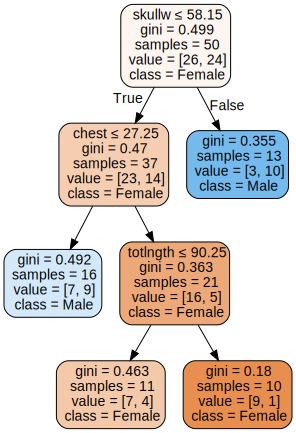

In [6]:
dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=X.columns,
    class_names=['Female', 'Male'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

In [7]:


param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 10],
    'criterion': ['gini', 'entropy']
}


grid = GridSearchCV(clf, param_grid, cv=20, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

print(grid.best_params_)
# find best model score
print(grid.score(X_test, y_test))


{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.7058823529411765


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Random Forest Classifier

In [8]:
rf = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=2, n_estimators=50)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


print("-------------------Random Forest Model Report------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



y_prob = rf.predict_proba(X_test)[:, 1]

-------------------Random Forest Model Report------------------------
Accuracy: 0.5686274509803921
Confusion Matrix:
 [[ 9  7]
 [15 20]]
Classification Report:
               precision    recall  f1-score   support

       False       0.38      0.56      0.45        16
        True       0.74      0.57      0.65        35

    accuracy                           0.57        51
   macro avg       0.56      0.57      0.55        51
weighted avg       0.63      0.57      0.58        51



In [9]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt','log']
}

grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

print(grid.best_params_)
# find best model score
print(grid.score(X_test, y_test))

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
1.0


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Adaboost Classifier

In [10]:
ad = AdaBoostClassifier(learning_rate=.1, n_estimators=200)
ad = ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
print("-------------------Adaboost Model Report------------------------")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_prob = ad.predict_proba(X_test)[:, 1]

-------------------Adaboost Model Report------------------------
Accuracy: 0.5490196078431373
Confusion Matrix:
 [[11  5]
 [18 17]]
Classification Report:
               precision    recall  f1-score   support

       False       0.38      0.69      0.49        16
        True       0.77      0.49      0.60        35

    accuracy                           0.55        51
   macro avg       0.58      0.59      0.54        51
weighted avg       0.65      0.55      0.56        51



In [11]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

grid = GridSearchCV(ad, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

XGBoost Classifier

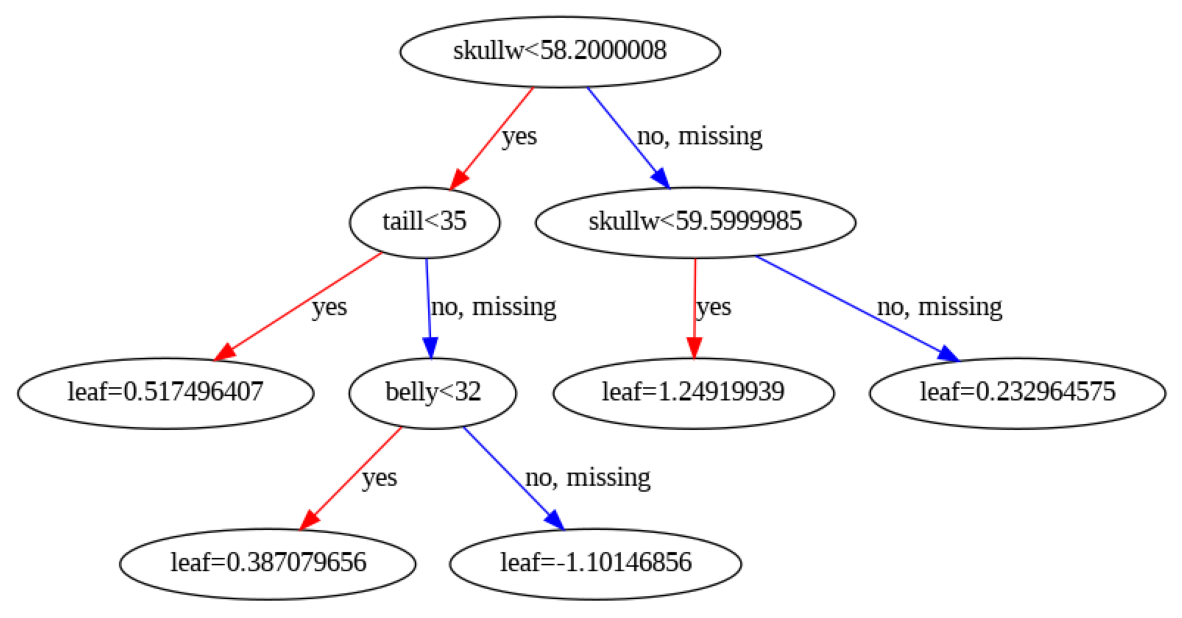

In [12]:
model = xgb.XGBClassifier(n_estimators=50, random_state=42, enable_categorical=True, max_depth=3, learning_rate=1, min_child_weight=1)
model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15, 15)) # Adjust figure size as needed
xgb.plot_tree(model, tree_idx=0, ax=ax)
plt.show()

In [13]:
y_pred = model.predict(X_test)
print("-------------------XGBoost Model Report------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]

-------------------XGBoost Model Report------------------------
Accuracy: 0.6078431372549019
Confusion Matrix:
 [[ 8  8]
 [12 23]]
Classification Report:
               precision    recall  f1-score   support

       False       0.40      0.50      0.44        16
        True       0.74      0.66      0.70        35

    accuracy                           0.61        51
   macro avg       0.57      0.58      0.57        51
weighted avg       0.63      0.61      0.62        51



In [14]:

param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}


grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

ROC Curve

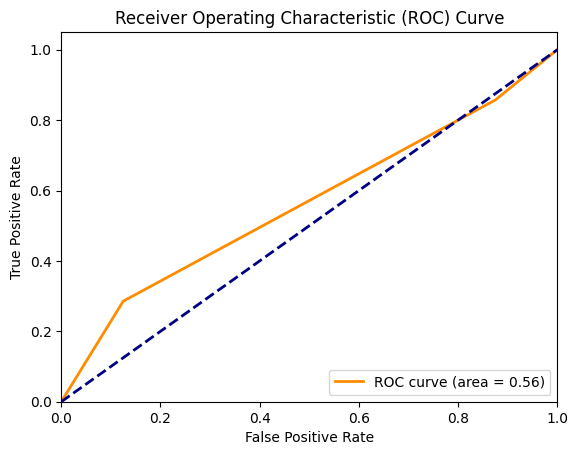

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

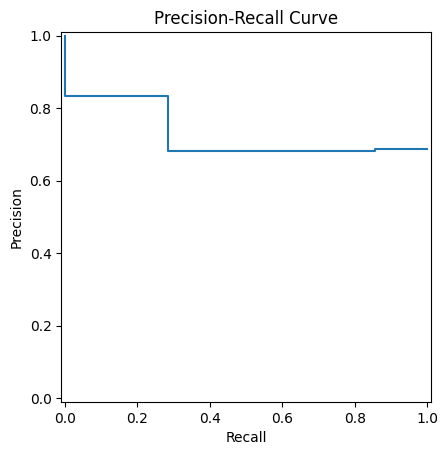

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()